In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('Real estate valuation data set.csv')

In [29]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [30]:
data.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [31]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
No,414.0,207.500000,119.655756,1.00000,104.250000,207.50000,310.750000,414.00000
X1 transaction date,414.0,2013.148971,0.281967,2012.66700,2012.917000,2013.16700,2013.417000,2013.58300
X2 house age,414.0,17.712560,11.392485,0.00000,9.025000,16.10000,28.150000,43.80000
X3 distance to the nearest MRT station,414.0,1083.885689,1262.109595,23.38284,289.324800,492.23130,1454.279000,6488.02100
X4 number of convenience stores,414.0,4.094203,2.945562,0.00000,1.000000,4.00000,6.000000,10.00000
X5 latitude,414.0,24.969030,0.012410,24.93207,24.963000,24.97110,24.977455,25.01459
X6 longitude,414.0,121.533361,0.015347,121.47353,121.528085,121.53863,121.543305,121.56627
Y house price of unit area,414.0,37.980193,13.606488,7.60000,27.700000,38.45000,46.600000,117.50000


In [32]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [33]:
df = data.drop(['No', 'X5 latitude', 'X6 longitude'], axis=1)
df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1
...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4
410,2012.667,5.6,90.45606,9,50.0
411,2013.250,18.8,390.96960,7,40.6
412,2013.000,8.1,104.81010,5,52.5


## Exploratory Analysis

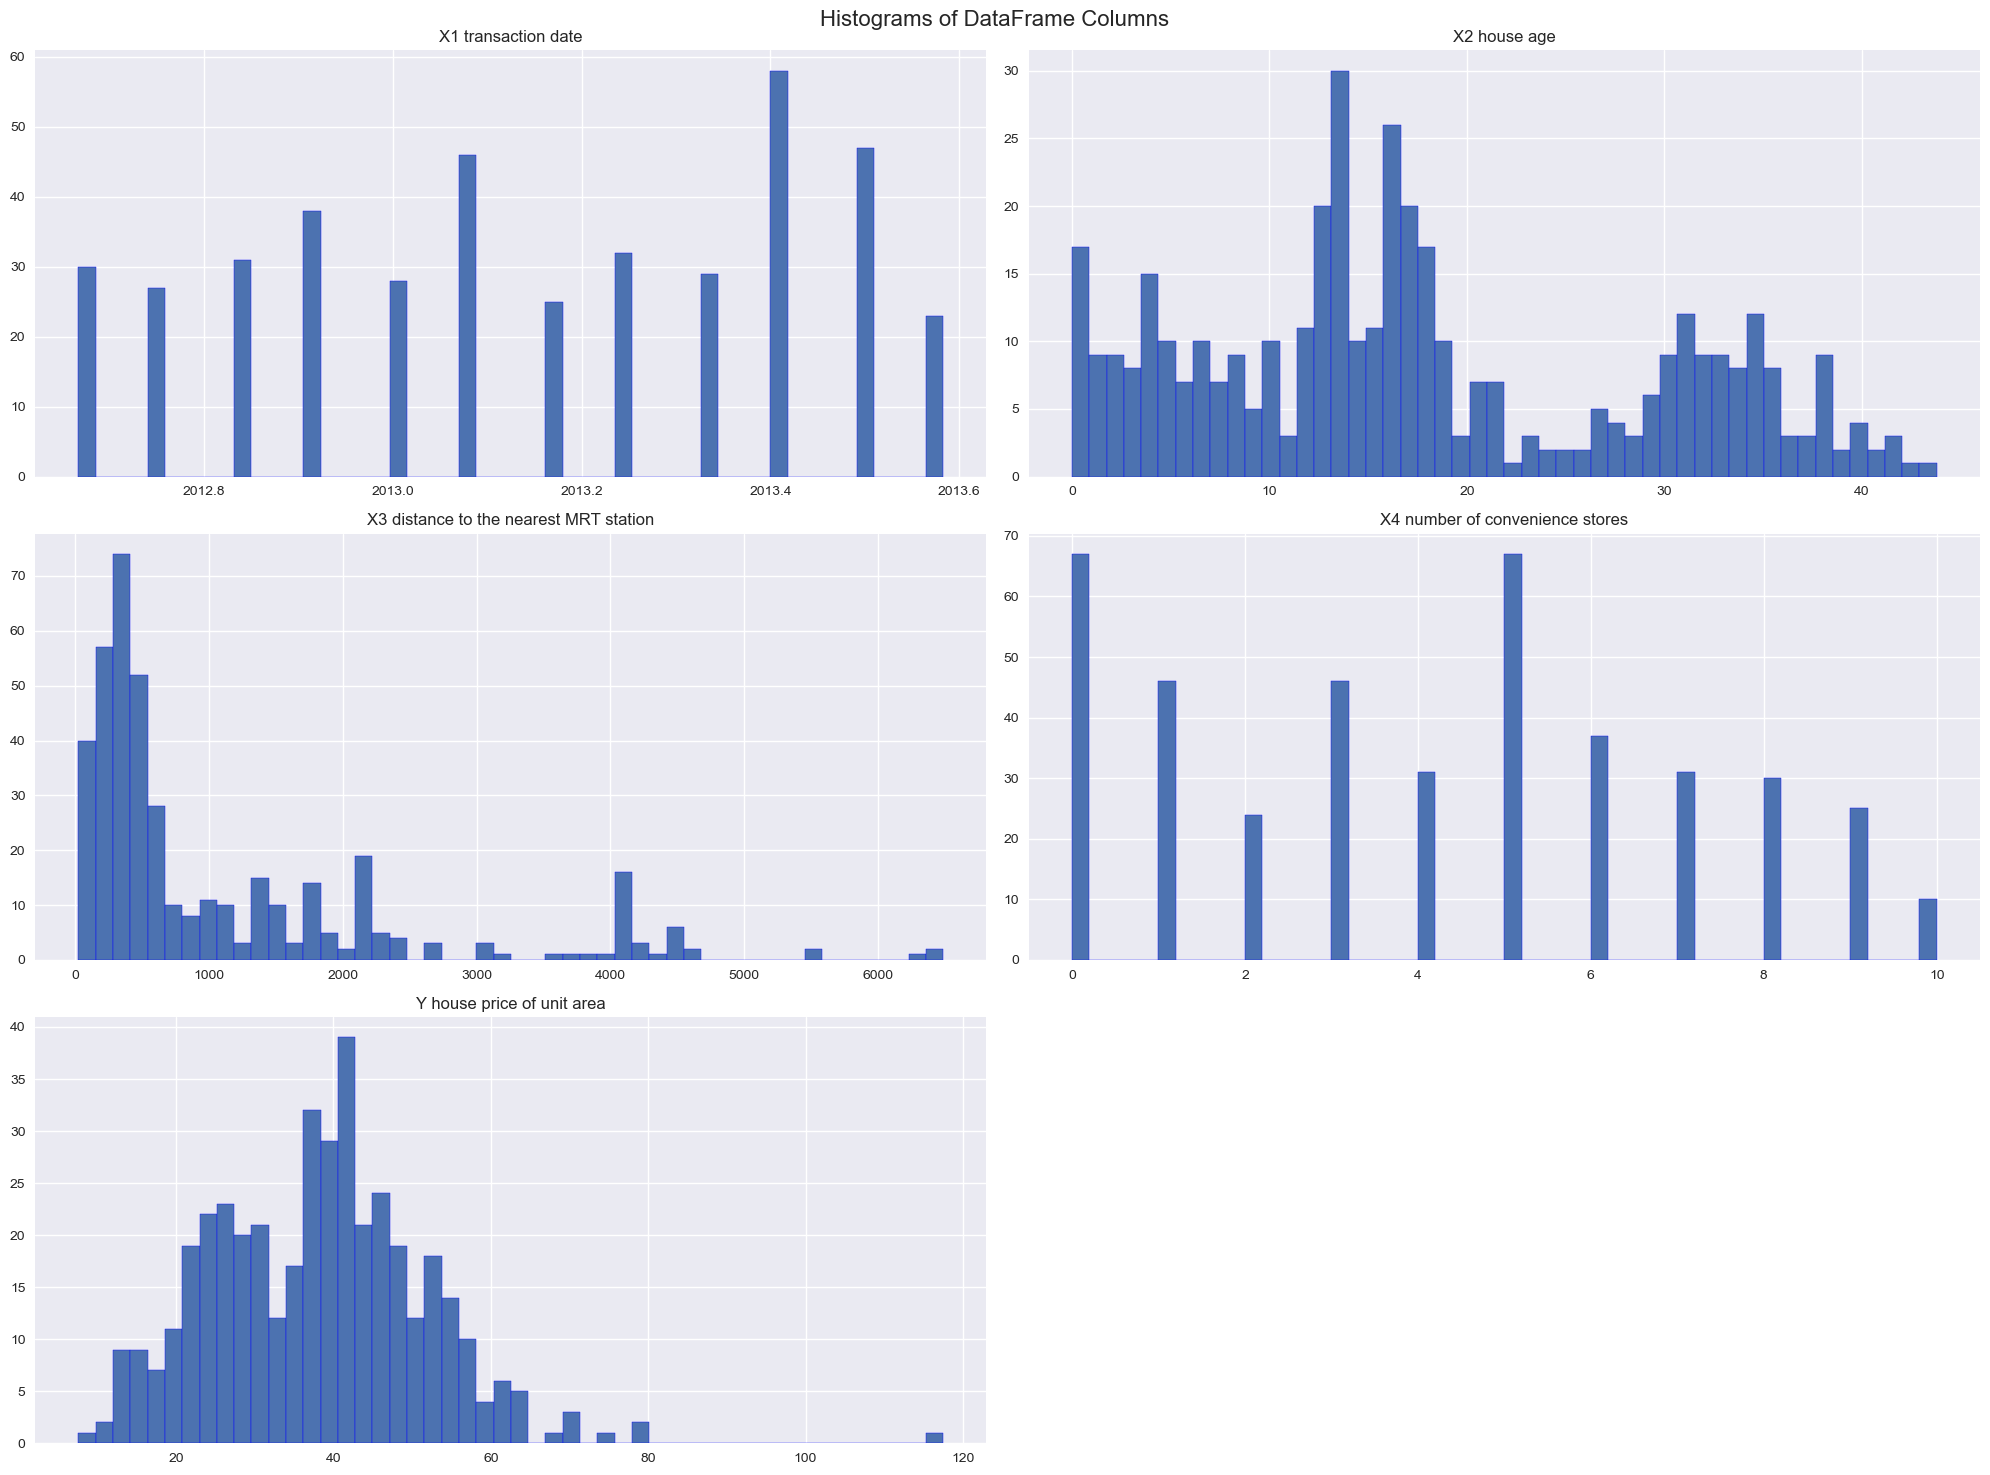

In [34]:
plt.style.use('seaborn-v0_8')

df.hist(bins=50, figsize=(20,15), edgecolor='b')

plt.suptitle('Histograms of DataFrame Columns', fontsize=16)
plt.tight_layout()
plt.show()

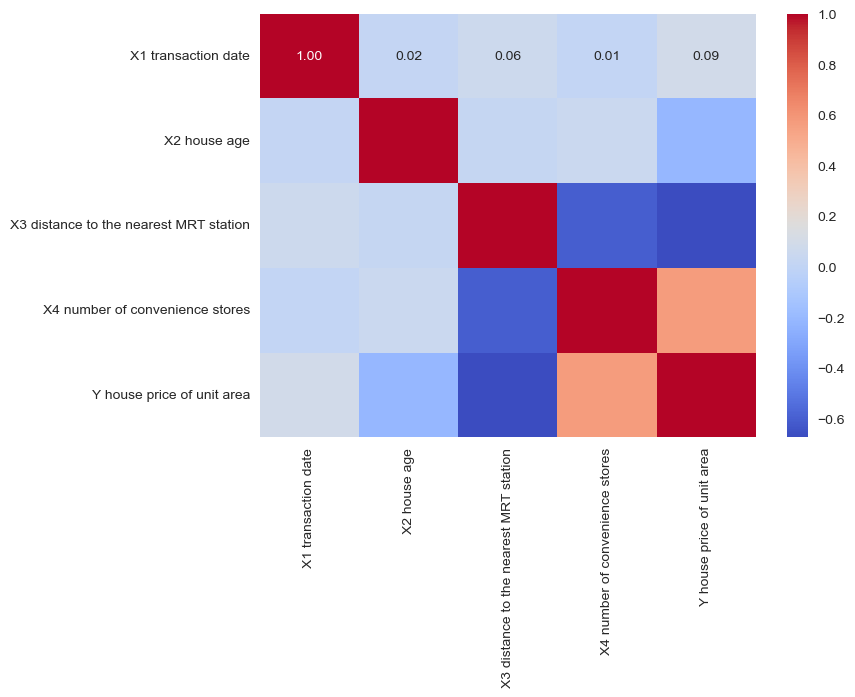

In [35]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [38]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Extract year and fraction
year = df['X1 transaction date'].astype(int)
fraction = df['X1 transaction date'] - year

# Check if each year is a leap year
is_leap = ((year % 4 == 0) & (year % 100 != 0)) | (year % 400 == 0)

# Calculate days in the year for each row
days_in_year = is_leap.replace({True: 366, False: 365})

# Calculate the day of the year (ensure it's an integer)
day_of_year = (fraction * days_in_year).astype(int) + 1

# Convert to a date using NumPy
start_of_year = pd.to_datetime(year.astype(str) + '-01-01')
df['date'] = start_of_year + pd.to_timedelta(day_of_year - 1, unit='d')

# Format the date (optional)
df['date'] = df['date'].dt.strftime('%Y-%m-%d')

df

C:\Users\supre\AppData\Local\Temp\ipykernel_57020\2683120832.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  days_in_year = is_leap.replace({True: 366, False: 365})


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,date
0,2012.917,32.0,84.87882,10,37.9,2012-12-01
1,2012.917,19.5,306.59470,9,42.2,2012-12-01
2,2013.583,13.3,561.98450,5,47.3,2013-08-01
3,2013.500,13.3,561.98450,5,54.8,2013-07-02
4,2012.833,5.0,390.56840,5,43.1,2012-10-31
...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4,2013-01-01
410,2012.667,5.6,90.45606,9,50.0,2012-09-01
411,2013.250,18.8,390.96960,7,40.6,2013-04-02
412,2013.000,8.1,104.81010,5,52.5,2013-01-01


In [47]:
df['date'] = pd.to_datetime(df['date'])
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['month_name'] = df['date'].dt.month_name()

df

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,Y house price of unit area,date,day,month,year,month_name
0,2012.917,32.0,84.87882,10,37.9,2012-12-01,1,12,2012,December
1,2012.917,19.5,306.59470,9,42.2,2012-12-01,1,12,2012,December
2,2013.583,13.3,561.98450,5,47.3,2013-08-01,1,8,2013,August
3,2013.500,13.3,561.98450,5,54.8,2013-07-02,2,7,2013,July
4,2012.833,5.0,390.56840,5,43.1,2012-10-31,31,10,2012,October
...,...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,15.4,2013-01-01,1,1,2013,January
410,2012.667,5.6,90.45606,9,50.0,2012-09-01,1,9,2012,September
411,2013.250,18.8,390.96960,7,40.6,2013-04-02,2,4,2013,April
412,2013.000,8.1,104.81010,5,52.5,2013-01-01,1,1,2013,January


C:\Users\supre\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


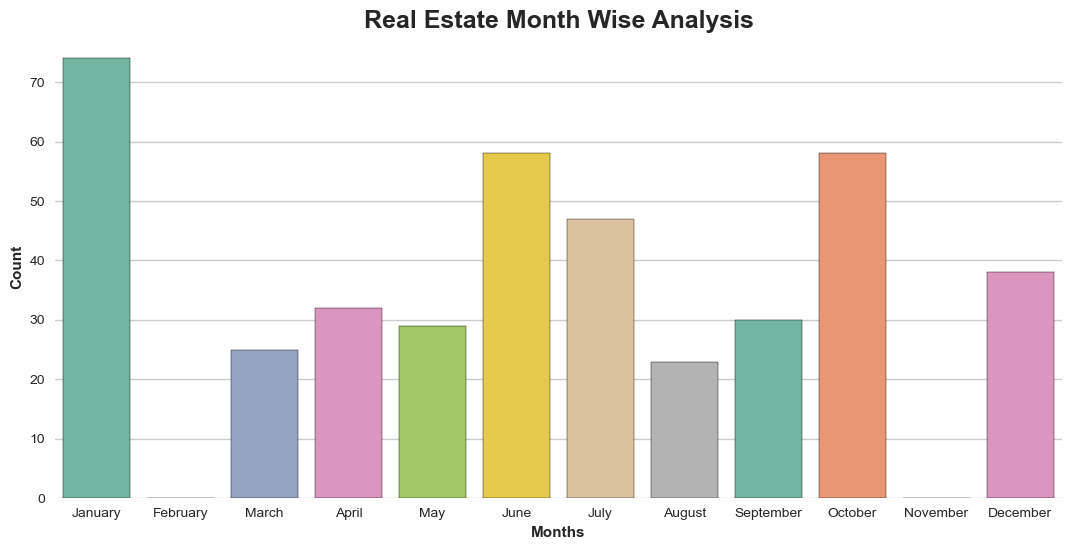

In [50]:
import seaborn as sns
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

df['month_name'] = pd.Categorical(df['month_name'], categories=month_order, ordered=True)
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month_name', data=df, ec='black', palette='Set2')
plt.title('Real Estate Month Wise Analysis', fontsize=18, weight='bold')
plt.ylabel('Count', weight='bold')
plt.xlabel('Months', weight='bold')
plt.show()

In [53]:
dftemp = df.drop(['date', 'day', 'month', 'month_name', 'year', 'X1 transaction date'], axis=1)

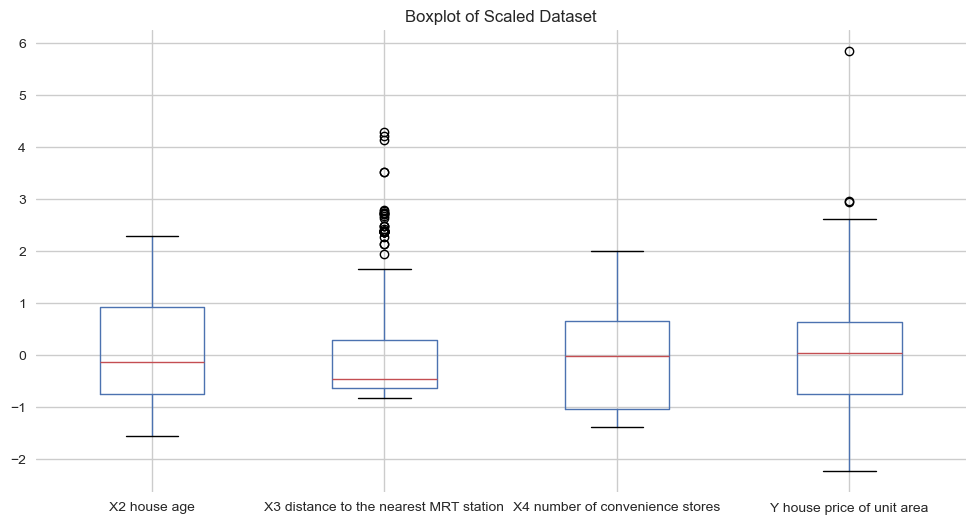

In [52]:
from sklearn.preprocessing import StandardScaler
dftemp = pd.DataFrame(dftemp)

# Scale the data
scaler = StandardScaler()
dftemp_scaled = pd.DataFrame(scaler.fit_transform(dftemp), columns=dftemp.columns)

# Create the boxplot
fig = plt.figure(figsize=(12, 6))
ax = dftemp_scaled.boxplot()
ax.set_title('Boxplot of Scaled Dataset')
plt.show()